In [1]:
import pandas as pd
import numpy as np

from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# defining the dataset by reading the file
df = pd.read_csv(r'ParisHousing.csv')
df.shape

(10000, 17)

In [3]:
# checking the correlation of the columns
df.corr()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
squareMeters,1.000000,0.009573,-0.006650,-0.005594,0.001109,-0.001541,0.008758,0.016619,-0.007207,-0.010667,0.007480,-0.003960,-0.000588,-0.017246,-0.003486,-0.000623,0.999999
numberOfRooms,0.009573,1.000000,-0.011240,0.017015,0.022244,0.009040,0.008340,0.016766,0.003978,-0.002865,-0.001656,-0.013990,0.012061,0.023188,-0.004760,-0.015529,0.009591
hasYard,-0.006650,-0.011240,1.000000,0.015514,-0.000883,0.006760,0.005023,0.004279,0.002214,-0.008370,-0.007598,-0.008558,-0.003085,-0.004626,-0.009506,-0.007276,-0.006119
hasPool,-0.005594,0.017015,0.015514,1.000000,-0.004006,0.008072,0.014613,-0.006848,0.001894,0.000188,-0.001001,-0.007268,-0.011901,0.004832,0.001238,0.001123,-0.005070
floors,0.001109,0.022244,-0.000883,-0.004006,1.000000,0.002207,-0.004921,0.002463,0.005022,0.002458,-0.008566,0.006228,-0.000270,0.011303,0.003616,-0.021155,0.001654
cityCode,-0.001541,0.009040,0.006760,0.008072,0.002207,1.000000,0.011334,-0.007549,0.009266,-0.000224,-0.004941,0.002652,-0.002019,-0.002208,0.002554,-0.003338,-0.001539
cityPartRange,0.008758,0.008340,0.005023,0.014613,-0.004921,0.011334,1.000000,0.009238,0.007748,-0.001874,0.005224,0.004743,0.010696,-0.001648,-0.011338,-0.007153,0.008813
numPrevOwners,0.016619,0.016766,0.004279,-0.006848,0.002463,-0.007549,0.009238,1.000000,0.006858,-0.017420,0.002522,-0.000862,0.000719,0.020268,0.031707,-0.006082,0.016619
made,-0.007207,0.003978,0.002214,0.001894,0.005022,0.009266,0.007748,0.006858,1.000000,-0.001678,-0.000645,-0.005506,0.013773,0.005687,-0.007868,-0.005431,-0.007210
isNewBuilt,-0.010667,-0.002865,-0.008370,0.000188,0.002458,-0.000224,-0.001874,-0.017420,-0.001678,1.000000,0.003200,-0.015986,0.020127,0.002749,0.007011,0.019895,-0.010643


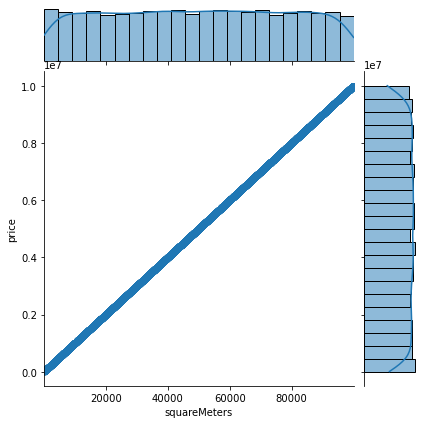

In [4]:
# according to the correlation coefficients, plot the relation of squareMeters to price. 
sns.jointplot(x=df['squareMeters'], y=df['price'], data=df, kind='reg')

In [5]:
#defining new dataset with specific columns for Linear Regression
df1 = df[['squareMeters', 'price']]

In [6]:
#checking the null values
df1.isnull().sum()

squareMeters    0
price           0
dtype: int64

In [7]:
#splitting the data to train and test datasets
X_train, X_test, y_train, y_test = train_test_split(df1.drop(['price'], axis=1),
                                                    df1['price'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((7000, 1), (3000, 1))

In [8]:
#defining linear Regression model and fitting it to train sets. 
lr = linear_model.LinearRegression()
lr.fit(X_train,y_train)
predict = lr.predict(X_test)

In [9]:
print('The intercept : ', lr.intercept_)
print('The coefficient: ', lr.coef_)

The intercept :  6459.548354141414
The coefficient:  [99.99993242]


In [10]:
print('Mean Square Error', metrics.mean_squared_error(y_test, predict))

Mean Square Error 10494865.005720302


In [11]:
print('Model RMSE', metrics.r2_score(y_test, predict))

Model RMSE 0.999998729552423


Text(0.5, 1.0, 'Linear Regression')

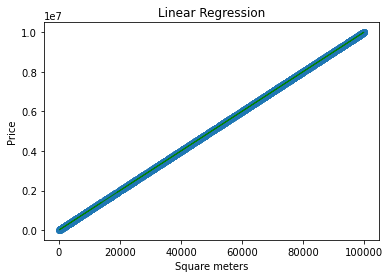

In [12]:
#Model Regression line on test set
plt.scatter(X_test, y_test)
plt.plot(X_test, predict, color='green', linewidth=1)
plt.xlabel('Square meters')
plt.ylabel('Price')
plt.title('Linear Regression')

Text(0, 0.5, 'Residual')

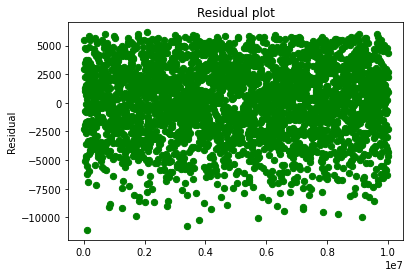

In [13]:
#Residual plot
plt.scatter(lr.predict(X_test), lr.predict(X_test) - y_test, c='g', s = 40)
plt.hlines(y=0, xmin=0, xmax=100)
plt.title('Residual plot')
plt.ylabel('Residual')

# Normal Equation

In [14]:
#finding the value of theta(hat)
def theta_calc(df1, df2):
    n_data = df1.shape[0]
    bias_term = np.ones((n_data, 1))
    df1_bias = np.append(bias_term, df1, axis=1)
    theta_1 = np.linalg.inv(np.dot(df1_bias.T, df1_bias))
    theta_2 = np.dot(theta_1, df1_bias.T)
    theta = np.dot(theta_2, df2)
    return theta

In [15]:
#finding optimal theta value using normal equations
theta = theta_calc(X_train, y_train)
intercept = theta[0]
slope = theta[1]
print('Intercept ', intercept)
print('Slope ', slope)

Intercept  6459.548354138758
Slope  99.99993241961283
